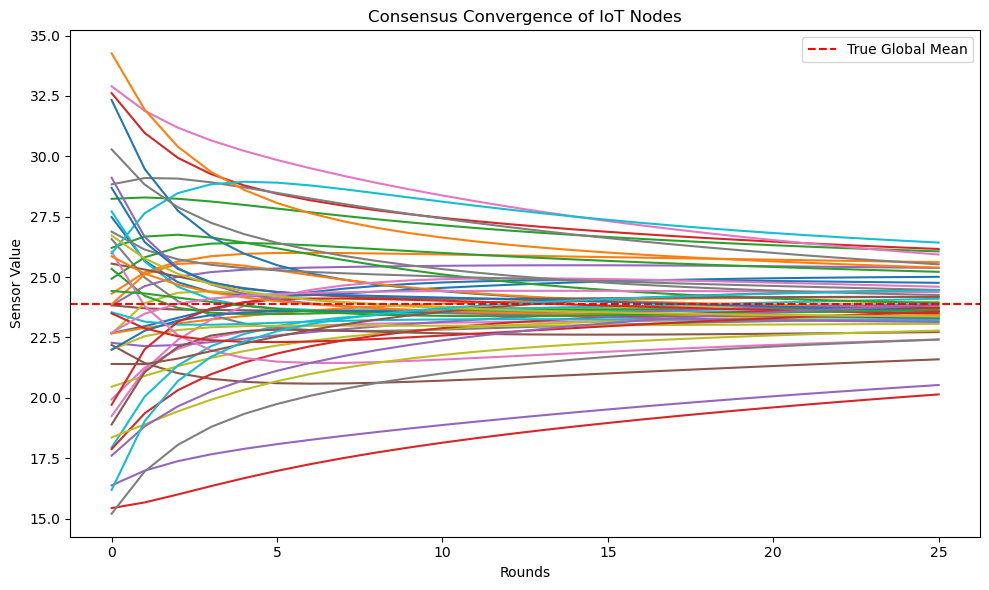

✅ True Mean: 23.87
✅ Average Final Node Value: 23.89
✅ Mean Absolute Error: 0.9179
✅ Total Messages Exchanged: ~3750


In [1]:
# ================================================================
# Consensus-Based Distributed IoT Data Aggregation System
# Author: Nowshika Mirza. R
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd

# -----------------------------
# Configuration
# -----------------------------
NUM_NODES = 50           # number of IoT devices
AVG_DEGREE = 3           # average connections per node
ROUNDS = 25              # consensus iterations
STEP_SIZE = 0.25         # epsilon for update rule
np.random.seed(42)

# -----------------------------
# Build IoT network graph
# -----------------------------
G = nx.watts_strogatz_graph(NUM_NODES, k=AVG_DEGREE, p=0.3)
initial_values = np.random.normal(loc=25, scale=5, size=NUM_NODES)  # sensor readings
true_mean = np.mean(initial_values)

# -----------------------------
# Consensus Algorithm
# -----------------------------
values = initial_values.copy()
history = [values.copy()]

for r in range(ROUNDS):
    new_values = values.copy()
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            neighbor_mean = np.mean(values[neighbors])
            new_values[node] += STEP_SIZE * (neighbor_mean - values[node])
    values = new_values.copy()
    history.append(values.copy())

# -----------------------------
# Analysis & Visualization
# -----------------------------
history = np.array(history)
df = pd.DataFrame(history)
df.to_csv("consensus_results.csv", index_label="Round")

plt.figure(figsize=(10,6))
plt.plot(history)
plt.axhline(true_mean, color='red', linestyle='--', label='True Global Mean')
plt.title("Consensus Convergence of IoT Nodes")
plt.xlabel("Rounds")
plt.ylabel("Sensor Value")
plt.legend()
plt.tight_layout()
plt.savefig("consensus_convergence.png")
plt.show()

# Performance metrics
final_error = np.abs(values - true_mean).mean()
print(f"✅ True Mean: {true_mean:.2f}")
print(f"✅ Average Final Node Value: {values.mean():.2f}")
print(f"✅ Mean Absolute Error: {final_error:.4f}")
print(f"✅ Total Messages Exchanged: ~{ROUNDS * NUM_NODES * AVG_DEGREE}")
